In [1]:
import pandas
pandas.__version__

'0.23.4'

https://www.bmreports.com/bmrs/?q=demand/rollingsystemdemand

In [2]:
!head RollingSystemDemand_20180901_0129.csv

HDR,ROLLING SYSTEM DEMAND
VD,20180601000000,25152
VD,20180601000500,25231
VD,20180601001000,25070
VD,20180601001500,25019
VD,20180601002000,24943
VD,20180601002500,24727
VD,20180601003000,24716
VD,20180601003500,24815
VD,20180601004000,24877


In [3]:
dframe = pandas.read_csv("RollingSystemDemand_20180901_0129.csv")

In [4]:
dframe.head()

,HDR,ROLLING SYSTEM DEMAND
VD,20180601000000,25152.0
VD,20180601000500,25231.0
VD,20180601001000,25070.0
VD,20180601001500,25019.0
VD,20180601002000,24943.0


I don't like that Pandas is treating "VD" as the index, so I'm going to force the index to be numeric

In [5]:
#dataframe.reset_index() # not sure why this didn't work
dframe.index=range(len(dframe))
dframe.head()

,HDR,ROLLING SYSTEM DEMAND
0,20180601000000,25152.0
1,20180601000500,25231.0
2,20180601001000,25070.0
3,20180601001500,25019.0
4,20180601002000,24943.0


I don't like the column names, so I'm going to change those

In [6]:
dframe.columns=['time of measurement','demand level']

In [7]:
dframe.head()

,time of measurement,demand level
0,20180601000000,25152.0
1,20180601000500,25231.0
2,20180601001000,25070.0
3,20180601001500,25019.0
4,20180601002000,24943.0


I'm happy. Let's see what the plot looks like

In [8]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'2.2.3'

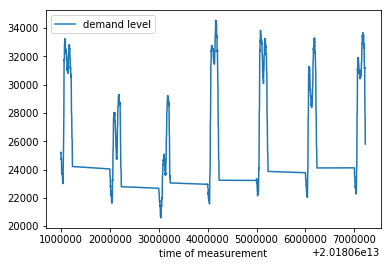

In [9]:
dframe.plot(x='time of measurement', y='demand level')
plt.show()

Hmm, those flat lines look unlikely. Switch to scatter plot

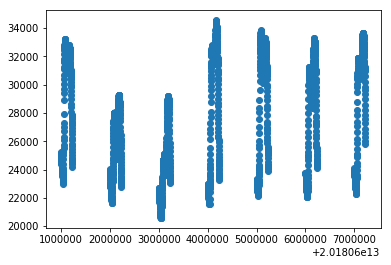

In [10]:
plt.scatter(dframe['time of measurement'], dframe['demand level'])
plt.show()

need to convert 'time of measurement' column to datetime

In [11]:
from datetime import datetime

In [12]:
# see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior for details

# using the first entry from the output of !head above
datetime_object = datetime.strptime('20180601000000', '%Y%m%d%H%M%S')
datetime_object.strftime('%Y-%m-%d %H:%M:%S')

'2018-06-01 00:00:00'

strptime = "string parse time"

strftime = "string format time"

Next, convert the entire column using that format

In [13]:
dframe['time of measurement'] = pandas.to_datetime(dframe['time of measurement'],format='%Y%m%d%H%M%S')

ValueError: time data 2000 does not match format '%Y%m%d%H%M%S' (match)

After much frustration, it turns out I was making an assumption that the data type was string

In [14]:
dframe.dtypes

time of measurement      int64
demand level           float64
dtype: object

In [15]:
dframe['time of measurement']=dframe['time of measurement'].to_string()

In [16]:
dframe['time of measurement'] = pandas.to_datetime(dframe['time of measurement'],format='%Y%m%d%H%M%S')

ValueError: time data '0       20180601000000\n1       20180601000500\n2       20180601001000\n3       20180601001500\n4       20180601002000\n5       20180601002500\n6       20180601003000\n7       20180601003500\n8       20180601004000\n9       20180601004500\n10      20180601005000\n11      20180601005500\n12      20180601010000\n13      20180601010500\n14      20180601011000\n15      20180601011500\n16      20180601012000\n17      20180601012500\n18      20180601013000\n19      20180601013500\n20      20180601014000\n21      20180601014500\n22      20180601015000\n23      20180601015500\n24      20180601020000\n25      20180601020500\n26      20180601021000\n27      20180601021500\n28      20180601022000\n29      20180601022500\n30      20180601023000\n31      20180601023500\n32      20180601024000\n33      20180601024500\n34      20180601025000\n35      20180601025500\n36      20180601030000\n37      20180601030500\n38      20180601031000\n39      20180601031500\n40      20180601032000\n41      20180601032500\n42      20180601033000\n43      20180601033500\n44      20180601034000\n45      20180601034500\n46      20180601035000\n47      20180601035500\n48      20180601040000\n49      20180601040500\n50      20180601041000\n51      20180601041500\n52      20180601042000\n53      20180601042500\n54      20180601043000\n55      20180601043500\n56      20180601044000\n57      20180601044500\n58      20180601045000\n59      20180601045500\n60      20180601050000\n61      20180601050500\n62      20180601051000\n63      20180601051500\n64      20180601052000\n65      20180601052500\n66      20180601053000\n67      20180601053500\n68      20180601054000\n69      20180601054500\n70      20180601055000\n71      20180601055500\n72      20180601060000\n73      20180601060500\n74      20180601061000\n75      20180601061500\n76      20180601062000\n77      20180601062500\n78      20180601063000\n79      20180601063500\n80      20180601064000\n81      20180601064500\n82      20180601065000\n83      20180601065500\n84      20180601070000\n85      20180601070500\n86      20180601071000\n87      20180601071500\n88      20180601072000\n89      20180601072500\n90      20180601073000\n91      20180601073500\n92      20180601074000\n93      20180601074500\n94      20180601075000\n95      20180601075500\n96      20180601080000\n97      20180601080500\n98      20180601081000\n99      20180601081500\n100     20180601082000\n101     20180601082500\n102     20180601083000\n103     20180601083500\n104     20180601084000\n105     20180601084500\n106     20180601085000\n107     20180601085500\n108     20180601090000\n109     20180601090500\n110     20180601091000\n111     20180601091500\n112     20180601092000\n113     20180601092500\n114     20180601093000\n115     20180601093500\n116     20180601094000\n117     20180601094500\n118     20180601095000\n119     20180601095500\n120     20180601100000\n121     20180601100500\n122     20180601101000\n123     20180601101500\n124     20180601102000\n125     20180601102500\n126     20180601103000\n127     20180601103500\n128     20180601104000\n129     20180601104500\n130     20180601105000\n131     20180601105500\n132     20180601110000\n133     20180601110500\n134     20180601111000\n135     20180601111500\n136     20180601112000\n137     20180601112500\n138     20180601113000\n139     20180601113500\n140     20180601114000\n141     20180601114500\n142     20180601115000\n143     20180601115500\n144     20180601120000\n145     20180601120500\n146     20180601121000\n147     20180601121500\n148     20180601122000\n149     20180601122500\n150     20180601123000\n151     20180601123500\n152     20180601124000\n153     20180601124500\n154     20180601125000\n155     20180601125500\n156     20180601130000\n157     20180601130500\n158     20180601131000\n159     20180601131500\n160     20180601132000\n161     20180601132500\n162     20180601133000\n163     20180601133500\n164     20180601134000\n165     20180601134500\n166     20180601135000\n167     20180601135500\n168     20180601140000\n169     20180601140500\n170     20180601141000\n171     20180601141500\n172     20180601142000\n173     20180601142500\n174     20180601143000\n175     20180601143500\n176     20180601144000\n177     20180601144500\n178     20180601145000\n179     20180601145500\n180     20180601150000\n181     20180601150500\n182     20180601151000\n183     20180601151500\n184     20180601152000\n185     20180601152500\n186     20180601153000\n187     20180601153500\n188     20180601154000\n189     20180601154500\n190     20180601155000\n191     20180601155500\n192     20180601160000\n193     20180601160500\n194     20180601161000\n195     20180601161500\n196     20180601162000\n197     20180601162500\n198     20180601163000\n199     20180601163500\n200     20180601164000\n201     20180601164500\n202     20180601165000\n203     20180601165500\n204     20180601170000\n205     20180601170500\n206     20180601171000\n207     20180601171500\n208     20180601172000\n209     20180601172500\n210     20180601173000\n211     20180601173500\n212     20180601174000\n213     20180601174500\n214     20180601175000\n215     20180601175500\n216     20180601180000\n217     20180601180500\n218     20180601181000\n219     20180601181500\n220     20180601182000\n221     20180601182500\n222     20180601183000\n223     20180601183500\n224     20180601184000\n225     20180601184500\n226     20180601185000\n227     20180601185500\n228     20180601190000\n229     20180601190500\n230     20180601191000\n231     20180601191500\n232     20180601192000\n233     20180601192500\n234     20180601193000\n235     20180601193500\n236     20180601194000\n237     20180601194500\n238     20180601195000\n239     20180601195500\n240     20180601200000\n241     20180601200500\n242     20180601201000\n243     20180601201500\n244     20180601202000\n245     20180601202500\n246     20180601203000\n247     20180601203500\n248     20180601204000\n249     20180601204500\n250     20180601205000\n251     20180601205500\n252     20180601210000\n253     20180601210500\n254     20180601211000\n255     20180601211500\n256     20180601212000\n257     20180601212500\n258     20180601213000\n259     20180601213500\n260     20180601214000\n261     20180601214500\n262     20180601215000\n263     20180601215500\n264     20180601220000\n265     20180601220500\n266     20180601221000\n267     20180601221500\n268     20180601222000\n269     20180601222500\n270     20180601223000\n271     20180601223500\n272     20180601224000\n273     20180601224500\n274     20180601225000\n275     20180601225500\n276     20180601230000\n277     20180601230500\n278     20180601231000\n279     20180601231500\n280     20180601232000\n281     20180601232500\n282     20180601233000\n283     20180601233500\n284     20180601234000\n285     20180601234500\n286     20180601235000\n287     20180601235500\n288     20180602000000\n289     20180602000500\n290     20180602001000\n291     20180602001500\n292     20180602002000\n293     20180602002500\n294     20180602003000\n295     20180602003500\n296     20180602004000\n297     20180602004500\n298     20180602005000\n299     20180602005500\n300     20180602010000\n301     20180602010500\n302     20180602011000\n303     20180602011500\n304     20180602012000\n305     20180602012500\n306     20180602013000\n307     20180602013500\n308     20180602014000\n309     20180602014500\n310     20180602015000\n311     20180602015500\n312     20180602020000\n313     20180602020500\n314     20180602021000\n315     20180602021500\n316     20180602022000\n317     20180602022500\n318     20180602023000\n319     20180602023500\n320     20180602024000\n321     20180602024500\n322     20180602025000\n323     20180602025500\n324     20180602030000\n325     20180602030500\n326     20180602031000\n327     20180602031500\n328     20180602032000\n329     20180602032500\n330     20180602033000\n331     20180602033500\n332     20180602034000\n333     20180602034500\n334     20180602035000\n335     20180602035500\n336     20180602040000\n337     20180602040500\n338     20180602041000\n339     20180602041500\n340     20180602042000\n341     20180602042500\n342     20180602043000\n343     20180602043500\n344     20180602044000\n345     20180602044500\n346     20180602045000\n347     20180602045500\n348     20180602050000\n349     20180602050500\n350     20180602051000\n351     20180602051500\n352     20180602052000\n353     20180602052500\n354     20180602053000\n355     20180602053500\n356     20180602054000\n357     20180602054500\n358     20180602055000\n359     20180602055500\n360     20180602060000\n361     20180602060500\n362     20180602061000\n363     20180602061500\n364     20180602062000\n365     20180602062500\n366     20180602063000\n367     20180602063500\n368     20180602064000\n369     20180602064500\n370     20180602065000\n371     20180602065500\n372     20180602070000\n373     20180602070500\n374     20180602071000\n375     20180602071500\n376     20180602072000\n377     20180602072500\n378     20180602073000\n379     20180602073500\n380     20180602074000\n381     20180602074500\n382     20180602075000\n383     20180602075500\n384     20180602080000\n385     20180602080500\n386     20180602081000\n387     20180602081500\n388     20180602082000\n389     20180602082500\n390     20180602083000\n391     20180602083500\n392     20180602084000\n393     20180602084500\n394     20180602085000\n395     20180602085500\n396     20180602090000\n397     20180602090500\n398     20180602091000\n399     20180602091500\n400     20180602092000\n401     20180602092500\n402     20180602093000\n403     20180602093500\n404     20180602094000\n405     20180602094500\n406     20180602095000\n407     20180602095500\n408     20180602100000\n409     20180602100500\n410     20180602101000\n411     20180602101500\n412     20180602102000\n413     20180602102500\n414     20180602103000\n415     20180602103500\n416     20180602104000\n417     20180602104500\n418     20180602105000\n419     20180602105500\n420     20180602110000\n421     20180602110500\n422     20180602111000\n423     20180602111500\n424     20180602112000\n425     20180602112500\n426     20180602113000\n427     20180602113500\n428     20180602114000\n429     20180602114500\n430     20180602115000\n431     20180602115500\n432     20180602120000\n433     20180602120500\n434     20180602121000\n435     20180602121500\n436     20180602122000\n437     20180602122500\n438     20180602123000\n439     20180602123500\n440     20180602124000\n441     20180602124500\n442     20180602125000\n443     20180602125500\n444     20180602130000\n445     20180602130500\n446     20180602131000\n447     20180602131500\n448     20180602132000\n449     20180602132500\n450     20180602133000\n451     20180602133500\n452     20180602134000\n453     20180602134500\n454     20180602135000\n455     20180602135500\n456     20180602140000\n457     20180602140500\n458     20180602141000\n459     20180602141500\n460     20180602142000\n461     20180602142500\n462     20180602143000\n463     20180602143500\n464     20180602144000\n465     20180602144500\n466     20180602145000\n467     20180602145500\n468     20180602150000\n469     20180602150500\n470     20180602151000\n471     20180602151500\n472     20180602152000\n473     20180602152500\n474     20180602153000\n475     20180602153500\n476     20180602154000\n477     20180602154500\n478     20180602155000\n479     20180602155500\n480     20180602160000\n481     20180602160500\n482     20180602161000\n483     20180602161500\n484     20180602162000\n485     20180602162500\n486     20180602163000\n487     20180602163500\n488     20180602164000\n489     20180602164500\n490     20180602165000\n491     20180602165500\n492     20180602170000\n493     20180602170500\n494     20180602171000\n495     20180602171500\n496     20180602172000\n497     20180602172500\n498     20180602173000\n499     20180602173500\n500     20180602174000\n501     20180602174500\n502     20180602175000\n503     20180602175500\n504     20180602180000\n505     20180602180500\n506     20180602181000\n507     20180602181500\n508     20180602182000\n509     20180602182500\n510     20180602183000\n511     20180602183500\n512     20180602184000\n513     20180602184500\n514     20180602185000\n515     20180602185500\n516     20180602190000\n517     20180602190500\n518     20180602191000\n519     20180602191500\n520     20180602192000\n521     20180602192500\n522     20180602193000\n523     20180602193500\n524     20180602194000\n525     20180602194500\n526     20180602195000\n527     20180602195500\n528     20180602200000\n529     20180602200500\n530     20180602201000\n531     20180602201500\n532     20180602202000\n533     20180602202500\n534     20180602203000\n535     20180602203500\n536     20180602204000\n537     20180602204500\n538     20180602205000\n539     20180602205500\n540     20180602210000\n541     20180602210500\n542     20180602211000\n543     20180602211500\n544     20180602212000\n545     20180602212500\n546     20180602213000\n547     20180602213500\n548     20180602214000\n549     20180602214500\n550     20180602215000\n551     20180602215500\n552     20180602220000\n553     20180602220500\n554     20180602221000\n555     20180602221500\n556     20180602222000\n557     20180602222500\n558     20180602223000\n559     20180602223500\n560     20180602224000\n561     20180602224500\n562     20180602225000\n563     20180602225500\n564     20180602230000\n565     20180602230500\n566     20180602231000\n567     20180602231500\n568     20180602232000\n569     20180602232500\n570     20180602233000\n571     20180602233500\n572     20180602234000\n573     20180602234500\n574     20180602235000\n575     20180602235500\n576     20180603000000\n577     20180603000500\n578     20180603001000\n579     20180603001500\n580     20180603002000\n581     20180603002500\n582     20180603003000\n583     20180603003500\n584     20180603004000\n585     20180603004500\n586     20180603005000\n587     20180603005500\n588     20180603010000\n589     20180603010500\n590     20180603011000\n591     20180603011500\n592     20180603012000\n593     20180603012500\n594     20180603013000\n595     20180603013500\n596     20180603014000\n597     20180603014500\n598     20180603015000\n599     20180603015500\n600     20180603020000\n601     20180603020500\n602     20180603021000\n603     20180603021500\n604     20180603022000\n605     20180603022500\n606     20180603023000\n607     20180603023500\n608     20180603024000\n609     20180603024500\n610     20180603025000\n611     20180603025500\n612     20180603030000\n613     20180603030500\n614     20180603031000\n615     20180603031500\n616     20180603032000\n617     20180603032500\n618     20180603033000\n619     20180603033500\n620     20180603034000\n621     20180603034500\n622     20180603035000\n623     20180603035500\n624     20180603040000\n625     20180603040500\n626     20180603041000\n627     20180603041500\n628     20180603042000\n629     20180603042500\n630     20180603043000\n631     20180603043500\n632     20180603044000\n633     20180603044500\n634     20180603045000\n635     20180603045500\n636     20180603050000\n637     20180603050500\n638     20180603051000\n639     20180603051500\n640     20180603052000\n641     20180603052500\n642     20180603053000\n643     20180603053500\n644     20180603054000\n645     20180603054500\n646     20180603055000\n647     20180603055500\n648     20180603060000\n649     20180603060500\n650     20180603061000\n651     20180603061500\n652     20180603062000\n653     20180603062500\n654     20180603063000\n655     20180603063500\n656     20180603064000\n657     20180603064500\n658     20180603065000\n659     20180603065500\n660     20180603070000\n661     20180603070500\n662     20180603071000\n663     20180603071500\n664     20180603072000\n665     20180603072500\n666     20180603073000\n667     20180603073500\n668     20180603074000\n669     20180603074500\n670     20180603075000\n671     20180603075500\n672     20180603080000\n673     20180603080500\n674     20180603081000\n675     20180603081500\n676     20180603082000\n677     20180603082500\n678     20180603083000\n679     20180603083500\n680     20180603084000\n681     20180603084500\n682     20180603085000\n683     20180603085500\n684     20180603090000\n685     20180603090500\n686     20180603091000\n687     20180603091500\n688     20180603092000\n689     20180603092500\n690     20180603093000\n691     20180603093500\n692     20180603094000\n693     20180603094500\n694     20180603095000\n695     20180603095500\n696     20180603100000\n697     20180603100500\n698     20180603101000\n699     20180603101500\n700     20180603102000\n701     20180603102500\n702     20180603103000\n703     20180603103500\n704     20180603104000\n705     20180603104500\n706     20180603105000\n707     20180603105500\n708     20180603110000\n709     20180603110500\n710     20180603111000\n711     20180603111500\n712     20180603112000\n713     20180603112500\n714     20180603113000\n715     20180603113500\n716     20180603114000\n717     20180603114500\n718     20180603115000\n719     20180603115500\n720     20180603120000\n721     20180603120500\n722     20180603121000\n723     20180603121500\n724     20180603122000\n725     20180603122500\n726     20180603123000\n727     20180603123500\n728     20180603124000\n729     20180603124500\n730     20180603125000\n731     20180603125500\n732     20180603130000\n733     20180603130500\n734     20180603131000\n735     20180603131500\n736     20180603132000\n737     20180603132500\n738     20180603133000\n739     20180603133500\n740     20180603134000\n741     20180603134500\n742     20180603135000\n743     20180603135500\n744     20180603140000\n745     20180603140500\n746     20180603141000\n747     20180603141500\n748     20180603142000\n749     20180603142500\n750     20180603143000\n751     20180603143500\n752     20180603144000\n753     20180603144500\n754     20180603145000\n755     20180603145500\n756     20180603150000\n757     20180603150500\n758     20180603151000\n759     20180603151500\n760     20180603152000\n761     20180603152500\n762     20180603153000\n763     20180603153500\n764     20180603154000\n765     20180603154500\n766     20180603155000\n767     20180603155500\n768     20180603160000\n769     20180603160500\n770     20180603161000\n771     20180603161500\n772     20180603162000\n773     20180603162500\n774     20180603163000\n775     20180603163500\n776     20180603164000\n777     20180603164500\n778     20180603165000\n779     20180603165500\n780     20180603170000\n781     20180603170500\n782     20180603171000\n783     20180603171500\n784     20180603172000\n785     20180603172500\n786     20180603173000\n787     20180603173500\n788     20180603174000\n789     20180603174500\n790     20180603175000\n791     20180603175500\n792     20180603180000\n793     20180603180500\n794     20180603181000\n795     20180603181500\n796     20180603182000\n797     20180603182500\n798     20180603183000\n799     20180603183500\n800     20180603184000\n801     20180603184500\n802     20180603185000\n803     20180603185500\n804     20180603190000\n805     20180603190500\n806     20180603191000\n807     20180603191500\n808     20180603192000\n809     20180603192500\n810     20180603193000\n811     20180603193500\n812     20180603194000\n813     20180603194500\n814     20180603195000\n815     20180603195500\n816     20180603200000\n817     20180603200500\n818     20180603201000\n819     20180603201500\n820     20180603202000\n821     20180603202500\n822     20180603203000\n823     20180603203500\n824     20180603204000\n825     20180603204500\n826     20180603205000\n827     20180603205500\n828     20180603210000\n829     20180603210500\n830     20180603211000\n831     20180603211500\n832     20180603212000\n833     20180603212500\n834     20180603213000\n835     20180603213500\n836     20180603214000\n837     20180603214500\n838     20180603215000\n839     20180603215500\n840     20180603220000\n841     20180603220500\n842     20180603221000\n843     20180603221500\n844     20180603222000\n845     20180603222500\n846     20180603223000\n847     20180603223500\n848     20180603224000\n849     20180603224500\n850     20180603225000\n851     20180603225500\n852     20180603230000\n853     20180603230500\n854     20180603231000\n855     20180603231500\n856     20180603232000\n857     20180603232500\n858     20180603233000\n859     20180603233500\n860     20180603234000\n861     20180603234500\n862     20180603235000\n863     20180603235500\n864     20180604000000\n865     20180604000500\n866     20180604001000\n867     20180604001500\n868     20180604002000\n869     20180604002500\n870     20180604003000\n871     20180604003500\n872     20180604004000\n873     20180604004500\n874     20180604005000\n875     20180604005500\n876     20180604010000\n877     20180604010500\n878     20180604011000\n879     20180604011500\n880     20180604012000\n881     20180604012500\n882     20180604013000\n883     20180604013500\n884     20180604014000\n885     20180604014500\n886     20180604015000\n887     20180604015500\n888     20180604020000\n889     20180604020500\n890     20180604021000\n891     20180604021500\n892     20180604022000\n893     20180604022500\n894     20180604023000\n895     20180604023500\n896     20180604024000\n897     20180604024500\n898     20180604025000\n899     20180604025500\n900     20180604030000\n901     20180604030500\n902     20180604031000\n903     20180604031500\n904     20180604032000\n905     20180604032500\n906     20180604033000\n907     20180604033500\n908     20180604034000\n909     20180604034500\n910     20180604035000\n911     20180604035500\n912     20180604040000\n913     20180604040500\n914     20180604041000\n915     20180604041500\n916     20180604042000\n917     20180604042500\n918     20180604043000\n919     20180604043500\n920     20180604044000\n921     20180604044500\n922     20180604045000\n923     20180604045500\n924     20180604050000\n925     20180604050500\n926     20180604051000\n927     20180604051500\n928     20180604052000\n929     20180604052500\n930     20180604053000\n931     20180604053500\n932     20180604054000\n933     20180604054500\n934     20180604055000\n935     20180604055500\n936     20180604060000\n937     20180604060500\n938     20180604061000\n939     20180604061500\n940     20180604062000\n941     20180604062500\n942     20180604063000\n943     20180604063500\n944     20180604064000\n945     20180604064500\n946     20180604065000\n947     20180604065500\n948     20180604070000\n949     20180604070500\n950     20180604071000\n951     20180604071500\n952     20180604072000\n953     20180604072500\n954     20180604073000\n955     20180604073500\n956     20180604074000\n957     20180604074500\n958     20180604075000\n959     20180604075500\n960     20180604080000\n961     20180604080500\n962     20180604081000\n963     20180604081500\n964     20180604082000\n965     20180604082500\n966     20180604083000\n967     20180604083500\n968     20180604084000\n969     20180604084500\n970     20180604085000\n971     20180604085500\n972     20180604090000\n973     20180604090500\n974     20180604091000\n975     20180604091500\n976     20180604092000\n977     20180604092500\n978     20180604093000\n979     20180604093500\n980     20180604094000\n981     20180604094500\n982     20180604095000\n983     20180604095500\n984     20180604100000\n985     20180604100500\n986     20180604101000\n987     20180604101500\n988     20180604102000\n989     20180604102500\n990     20180604103000\n991     20180604103500\n992     20180604104000\n993     20180604104500\n994     20180604105000\n995     20180604105500\n996     20180604110000\n997     20180604110500\n998     20180604111000\n999     20180604111500\n1000    20180604112000\n1001    20180604112500\n1002    20180604113000\n1003    20180604113500\n1004    20180604114000\n1005    20180604114500\n1006    20180604115000\n1007    20180604115500\n1008    20180604120000\n1009    20180604120500\n1010    20180604121000\n1011    20180604121500\n1012    20180604122000\n1013    20180604122500\n1014    20180604123000\n1015    20180604123500\n1016    20180604124000\n1017    20180604124500\n1018    20180604125000\n1019    20180604125500\n1020    20180604130000\n1021    20180604130500\n1022    20180604131000\n1023    20180604131500\n1024    20180604132000\n1025    20180604132500\n1026    20180604133000\n1027    20180604133500\n1028    20180604134000\n1029    20180604134500\n1030    20180604135000\n1031    20180604135500\n1032    20180604140000\n1033    20180604140500\n1034    20180604141000\n1035    20180604141500\n1036    20180604142000\n1037    20180604142500\n1038    20180604143000\n1039    20180604143500\n1040    20180604144000\n1041    20180604144500\n1042    20180604145000\n1043    20180604145500\n1044    20180604150000\n1045    20180604150500\n1046    20180604151000\n1047    20180604151500\n1048    20180604152000\n1049    20180604152500\n1050    20180604153000\n1051    20180604153500\n1052    20180604154000\n1053    20180604154500\n1054    20180604155000\n1055    20180604155500\n1056    20180604160000\n1057    20180604160500\n1058    20180604161000\n1059    20180604161500\n1060    20180604162000\n1061    20180604162500\n1062    20180604163000\n1063    20180604163500\n1064    20180604164000\n1065    20180604164500\n1066    20180604165000\n1067    20180604165500\n1068    20180604170000\n1069    20180604170500\n1070    20180604171000\n1071    20180604171500\n1072    20180604172000\n1073    20180604172500\n1074    20180604173000\n1075    20180604173500\n1076    20180604174000\n1077    20180604174500\n1078    20180604175000\n1079    20180604175500\n1080    20180604180000\n1081    20180604180500\n1082    20180604181000\n1083    20180604181500\n1084    20180604182000\n1085    20180604182500\n1086    20180604183000\n1087    20180604183500\n1088    20180604184000\n1089    20180604184500\n1090    20180604185000\n1091    20180604185500\n1092    20180604190000\n1093    20180604190500\n1094    20180604191000\n1095    20180604191500\n1096    20180604192000\n1097    20180604192500\n1098    20180604193000\n1099    20180604193500\n1100    20180604194000\n1101    20180604194500\n1102    20180604195000\n1103    20180604195500\n1104    20180604200000\n1105    20180604200500\n1106    20180604201000\n1107    20180604201500\n1108    20180604202000\n1109    20180604202500\n1110    20180604203000\n1111    20180604203500\n1112    20180604204000\n1113    20180604204500\n1114    20180604205000\n1115    20180604205500\n1116    20180604210000\n1117    20180604210500\n1118    20180604211000\n1119    20180604211500\n1120    20180604212000\n1121    20180604212500\n1122    20180604213000\n1123    20180604213500\n1124    20180604214000\n1125    20180604214500\n1126    20180604215000\n1127    20180604215500\n1128    20180604220000\n1129    20180604220500\n1130    20180604221000\n1131    20180604221500\n1132    20180604222000\n1133    20180604222500\n1134    20180604223000\n1135    20180604223500\n1136    20180604224000\n1137    20180604224500\n1138    20180604225000\n1139    20180604225500\n1140    20180604230000\n1141    20180604230500\n1142    20180604231000\n1143    20180604231500\n1144    20180604232000\n1145    20180604232500\n1146    20180604233000\n1147    20180604233500\n1148    20180604234000\n1149    20180604234500\n1150    20180604235000\n1151    20180604235500\n1152    20180605000000\n1153    20180605000500\n1154    20180605001000\n1155    20180605001500\n1156    20180605002000\n1157    20180605002500\n1158    20180605003000\n1159    20180605003500\n1160    20180605004000\n1161    20180605004500\n1162    20180605005000\n1163    20180605005500\n1164    20180605010000\n1165    20180605010500\n1166    20180605011000\n1167    20180605011500\n1168    20180605012000\n1169    20180605012500\n1170    20180605013000\n1171    20180605013500\n1172    20180605014000\n1173    20180605014500\n1174    20180605015000\n1175    20180605015500\n1176    20180605020000\n1177    20180605020500\n1178    20180605021000\n1179    20180605021500\n1180    20180605022000\n1181    20180605022500\n1182    20180605023000\n1183    20180605023500\n1184    20180605024000\n1185    20180605024500\n1186    20180605025000\n1187    20180605025500\n1188    20180605030000\n1189    20180605030500\n1190    20180605031000\n1191    20180605031500\n1192    20180605032000\n1193    20180605032500\n1194    20180605033000\n1195    20180605033500\n1196    20180605034000\n1197    20180605034500\n1198    20180605035000\n1199    20180605035500\n1200    20180605040000\n1201    20180605040500\n1202    20180605041000\n1203    20180605041500\n1204    20180605042000\n1205    20180605042500\n1206    20180605043000\n1207    20180605043500\n1208    20180605044000\n1209    20180605044500\n1210    20180605045000\n1211    20180605045500\n1212    20180605050000\n1213    20180605050500\n1214    20180605051000\n1215    20180605051500\n1216    20180605052000\n1217    20180605052500\n1218    20180605053000\n1219    20180605053500\n1220    20180605054000\n1221    20180605054500\n1222    20180605055000\n1223    20180605055500\n1224    20180605060000\n1225    20180605060500\n1226    20180605061000\n1227    20180605061500\n1228    20180605062000\n1229    20180605062500\n1230    20180605063000\n1231    20180605063500\n1232    20180605064000\n1233    20180605064500\n1234    20180605065000\n1235    20180605065500\n1236    20180605070000\n1237    20180605070500\n1238    20180605071000\n1239    20180605071500\n1240    20180605072000\n1241    20180605072500\n1242    20180605073000\n1243    20180605073500\n1244    20180605074000\n1245    20180605074500\n1246    20180605075000\n1247    20180605075500\n1248    20180605080000\n1249    20180605080500\n1250    20180605081000\n1251    20180605081500\n1252    20180605082000\n1253    20180605082500\n1254    20180605083000\n1255    20180605083500\n1256    20180605084000\n1257    20180605084500\n1258    20180605085000\n1259    20180605085500\n1260    20180605090000\n1261    20180605090500\n1262    20180605091000\n1263    20180605091500\n1264    20180605092000\n1265    20180605092500\n1266    20180605093000\n1267    20180605093500\n1268    20180605094000\n1269    20180605094500\n1270    20180605095000\n1271    20180605095500\n1272    20180605100000\n1273    20180605100500\n1274    20180605101000\n1275    20180605101500\n1276    20180605102000\n1277    20180605102500\n1278    20180605103000\n1279    20180605103500\n1280    20180605104000\n1281    20180605104500\n1282    20180605105000\n1283    20180605105500\n1284    20180605110000\n1285    20180605110500\n1286    20180605111000\n1287    20180605111500\n1288    20180605112000\n1289    20180605112500\n1290    20180605113000\n1291    20180605113500\n1292    20180605114000\n1293    20180605114500\n1294    20180605115000\n1295    20180605115500\n1296    20180605120000\n1297    20180605120500\n1298    20180605121000\n1299    20180605121500\n1300    20180605122000\n1301    20180605122500\n1302    20180605123000\n1303    20180605123500\n1304    20180605124000\n1305    20180605124500\n1306    20180605125000\n1307    20180605125500\n1308    20180605130000\n1309    20180605130500\n1310    20180605131000\n1311    20180605131500\n1312    20180605132000\n1313    20180605132500\n1314    20180605133000\n1315    20180605133500\n1316    20180605134000\n1317    20180605134500\n1318    20180605135000\n1319    20180605135500\n1320    20180605140000\n1321    20180605140500\n1322    20180605141000\n1323    20180605141500\n1324    20180605142000\n1325    20180605142500\n1326    20180605143000\n1327    20180605143500\n1328    20180605144000\n1329    20180605144500\n1330    20180605145000\n1331    20180605145500\n1332    20180605150000\n1333    20180605150500\n1334    20180605151000\n1335    20180605151500\n1336    20180605152000\n1337    20180605152500\n1338    20180605153000\n1339    20180605153500\n1340    20180605154000\n1341    20180605154500\n1342    20180605155000\n1343    20180605155500\n1344    20180605160000\n1345    20180605160500\n1346    20180605161000\n1347    20180605161500\n1348    20180605162000\n1349    20180605162500\n1350    20180605163000\n1351    20180605163500\n1352    20180605164000\n1353    20180605164500\n1354    20180605165000\n1355    20180605165500\n1356    20180605170000\n1357    20180605170500\n1358    20180605171000\n1359    20180605171500\n1360    20180605172000\n1361    20180605172500\n1362    20180605173000\n1363    20180605173500\n1364    20180605174000\n1365    20180605174500\n1366    20180605175000\n1367    20180605175500\n1368    20180605180000\n1369    20180605180500\n1370    20180605181000\n1371    20180605181500\n1372    20180605182000\n1373    20180605182500\n1374    20180605183000\n1375    20180605183500\n1376    20180605184000\n1377    20180605184500\n1378    20180605185000\n1379    20180605185500\n1380    20180605190000\n1381    20180605190500\n1382    20180605191000\n1383    20180605191500\n1384    20180605192000\n1385    20180605192500\n1386    20180605193000\n1387    20180605193500\n1388    20180605194000\n1389    20180605194500\n1390    20180605195000\n1391    20180605195500\n1392    20180605200000\n1393    20180605200500\n1394    20180605201000\n1395    20180605201500\n1396    20180605202000\n1397    20180605202500\n1398    20180605203000\n1399    20180605203500\n1400    20180605204000\n1401    20180605204500\n1402    20180605205000\n1403    20180605205500\n1404    20180605210000\n1405    20180605210500\n1406    20180605211000\n1407    20180605211500\n1408    20180605212000\n1409    20180605212500\n1410    20180605213000\n1411    20180605213500\n1412    20180605214000\n1413    20180605214500\n1414    20180605215000\n1415    20180605215500\n1416    20180605220000\n1417    20180605220500\n1418    20180605221000\n1419    20180605221500\n1420    20180605222000\n1421    20180605222500\n1422    20180605223000\n1423    20180605223500\n1424    20180605224000\n1425    20180605224500\n1426    20180605225000\n1427    20180605225500\n1428    20180605230000\n1429    20180605230500\n1430    20180605231000\n1431    20180605231500\n1432    20180605232000\n1433    20180605232500\n1434    20180605233000\n1435    20180605233500\n1436    20180605234000\n1437    20180605234500\n1438    20180605235000\n1439    20180605235500\n1440    20180606000000\n1441    20180606000500\n1442    20180606001000\n1443    20180606001500\n1444    20180606002000\n1445    20180606002500\n1446    20180606003000\n1447    20180606003500\n1448    20180606004000\n1449    20180606004500\n1450    20180606005000\n1451    20180606005500\n1452    20180606010000\n1453    20180606010500\n1454    20180606011000\n1455    20180606011500\n1456    20180606012000\n1457    20180606012500\n1458    20180606013000\n1459    20180606013500\n1460    20180606014000\n1461    20180606014500\n1462    20180606015000\n1463    20180606015500\n1464    20180606020000\n1465    20180606020500\n1466    20180606021000\n1467    20180606021500\n1468    20180606022000\n1469    20180606022500\n1470    20180606023000\n1471    20180606023500\n1472    20180606024000\n1473    20180606024500\n1474    20180606025000\n1475    20180606025500\n1476    20180606030000\n1477    20180606030500\n1478    20180606031000\n1479    20180606031500\n1480    20180606032000\n1481    20180606032500\n1482    20180606033000\n1483    20180606033500\n1484    20180606034000\n1485    20180606034500\n1486    20180606035000\n1487    20180606035500\n1488    20180606040000\n1489    20180606040500\n1490    20180606041000\n1491    20180606041500\n1492    20180606042000\n1493    20180606042500\n1494    20180606043000\n1495    20180606043500\n1496    20180606044000\n1497    20180606044500\n1498    20180606045000\n1499    20180606045500\n1500    20180606050000\n1501    20180606050500\n1502    20180606051000\n1503    20180606051500\n1504    20180606052000\n1505    20180606052500\n1506    20180606053000\n1507    20180606053500\n1508    20180606054000\n1509    20180606054500\n1510    20180606055000\n1511    20180606055500\n1512    20180606060000\n1513    20180606060500\n1514    20180606061000\n1515    20180606061500\n1516    20180606062000\n1517    20180606062500\n1518    20180606063000\n1519    20180606063500\n1520    20180606064000\n1521    20180606064500\n1522    20180606065000\n1523    20180606065500\n1524    20180606070000\n1525    20180606070500\n1526    20180606071000\n1527    20180606071500\n1528    20180606072000\n1529    20180606072500\n1530    20180606073000\n1531    20180606073500\n1532    20180606074000\n1533    20180606074500\n1534    20180606075000\n1535    20180606075500\n1536    20180606080000\n1537    20180606080500\n1538    20180606081000\n1539    20180606081500\n1540    20180606082000\n1541    20180606082500\n1542    20180606083000\n1543    20180606083500\n1544    20180606084000\n1545    20180606084500\n1546    20180606085000\n1547    20180606085500\n1548    20180606090000\n1549    20180606090500\n1550    20180606091000\n1551    20180606091500\n1552    20180606092000\n1553    20180606092500\n1554    20180606093000\n1555    20180606093500\n1556    20180606094000\n1557    20180606094500\n1558    20180606095000\n1559    20180606095500\n1560    20180606100000\n1561    20180606100500\n1562    20180606101000\n1563    20180606101500\n1564    20180606102000\n1565    20180606102500\n1566    20180606103000\n1567    20180606103500\n1568    20180606104000\n1569    20180606104500\n1570    20180606105000\n1571    20180606105500\n1572    20180606110000\n1573    20180606110500\n1574    20180606111000\n1575    20180606111500\n1576    20180606112000\n1577    20180606112500\n1578    20180606113000\n1579    20180606113500\n1580    20180606114000\n1581    20180606114500\n1582    20180606115000\n1583    20180606115500\n1584    20180606120000\n1585    20180606120500\n1586    20180606121000\n1587    20180606121500\n1588    20180606122000\n1589    20180606122500\n1590    20180606123000\n1591    20180606123500\n1592    20180606124000\n1593    20180606124500\n1594    20180606125000\n1595    20180606125500\n1596    20180606130000\n1597    20180606130500\n1598    20180606131000\n1599    20180606131500\n1600    20180606132000\n1601    20180606132500\n1602    20180606133000\n1603    20180606133500\n1604    20180606134000\n1605    20180606134500\n1606    20180606135000\n1607    20180606135500\n1608    20180606140000\n1609    20180606140500\n1610    20180606141000\n1611    20180606141500\n1612    20180606142000\n1613    20180606142500\n1614    20180606143000\n1615    20180606143500\n1616    20180606144000\n1617    20180606144500\n1618    20180606145000\n1619    20180606145500\n1620    20180606150000\n1621    20180606150500\n1622    20180606151000\n1623    20180606151500\n1624    20180606152000\n1625    20180606152500\n1626    20180606153000\n1627    20180606153500\n1628    20180606154000\n1629    20180606154500\n1630    20180606155000\n1631    20180606155500\n1632    20180606160000\n1633    20180606160500\n1634    20180606161000\n1635    20180606161500\n1636    20180606162000\n1637    20180606162500\n1638    20180606163000\n1639    20180606163500\n1640    20180606164000\n1641    20180606164500\n1642    20180606165000\n1643    20180606165500\n1644    20180606170000\n1645    20180606170500\n1646    20180606171000\n1647    20180606171500\n1648    20180606172000\n1649    20180606172500\n1650    20180606173000\n1651    20180606173500\n1652    20180606174000\n1653    20180606174500\n1654    20180606175000\n1655    20180606175500\n1656    20180606180000\n1657    20180606180500\n1658    20180606181000\n1659    20180606181500\n1660    20180606182000\n1661    20180606182500\n1662    20180606183000\n1663    20180606183500\n1664    20180606184000\n1665    20180606184500\n1666    20180606185000\n1667    20180606185500\n1668    20180606190000\n1669    20180606190500\n1670    20180606191000\n1671    20180606191500\n1672    20180606192000\n1673    20180606192500\n1674    20180606193000\n1675    20180606193500\n1676    20180606194000\n1677    20180606194500\n1678    20180606195000\n1679    20180606195500\n1680    20180606200000\n1681    20180606200500\n1682    20180606201000\n1683    20180606201500\n1684    20180606202000\n1685    20180606202500\n1686    20180606203000\n1687    20180606203500\n1688    20180606204000\n1689    20180606204500\n1690    20180606205000\n1691    20180606205500\n1692    20180606210000\n1693    20180606210500\n1694    20180606211000\n1695    20180606211500\n1696    20180606212000\n1697    20180606212500\n1698    20180606213000\n1699    20180606213500\n1700    20180606214000\n1701    20180606214500\n1702    20180606215000\n1703    20180606215500\n1704    20180606220000\n1705    20180606220500\n1706    20180606221000\n1707    20180606221500\n1708    20180606222000\n1709    20180606222500\n1710    20180606223000\n1711    20180606223500\n1712    20180606224000\n1713    20180606224500\n1714    20180606225000\n1715    20180606225500\n1716    20180606230000\n1717    20180606230500\n1718    20180606231000\n1719    20180606231500\n1720    20180606232000\n1721    20180606232500\n1722    20180606233000\n1723    20180606233500\n1724    20180606234000\n1725    20180606234500\n1726    20180606235000\n1727    20180606235500\n1728    20180607000000\n1729    20180607000500\n1730    20180607001000\n1731    20180607001500\n1732    20180607002000\n1733    20180607002500\n1734    20180607003000\n1735    20180607003500\n1736    20180607004000\n1737    20180607004500\n1738    20180607005000\n1739    20180607005500\n1740    20180607010000\n1741    20180607010500\n1742    20180607011000\n1743    20180607011500\n1744    20180607012000\n1745    20180607012500\n1746    20180607013000\n1747    20180607013500\n1748    20180607014000\n1749    20180607014500\n1750    20180607015000\n1751    20180607015500\n1752    20180607020000\n1753    20180607020500\n1754    20180607021000\n1755    20180607021500\n1756    20180607022000\n1757    20180607022500\n1758    20180607023000\n1759    20180607023500\n1760    20180607024000\n1761    20180607024500\n1762    20180607025000\n1763    20180607025500\n1764    20180607030000\n1765    20180607030500\n1766    20180607031000\n1767    20180607031500\n1768    20180607032000\n1769    20180607032500\n1770    20180607033000\n1771    20180607033500\n1772    20180607034000\n1773    20180607034500\n1774    20180607035000\n1775    20180607035500\n1776    20180607040000\n1777    20180607040500\n1778    20180607041000\n1779    20180607041500\n1780    20180607042000\n1781    20180607042500\n1782    20180607043000\n1783    20180607043500\n1784    20180607044000\n1785    20180607044500\n1786    20180607045000\n1787    20180607045500\n1788    20180607050000\n1789    20180607050500\n1790    20180607051000\n1791    20180607051500\n1792    20180607052000\n1793    20180607052500\n1794    20180607053000\n1795    20180607053500\n1796    20180607054000\n1797    20180607054500\n1798    20180607055000\n1799    20180607055500\n1800    20180607060000\n1801    20180607060500\n1802    20180607061000\n1803    20180607061500\n1804    20180607062000\n1805    20180607062500\n1806    20180607063000\n1807    20180607063500\n1808    20180607064000\n1809    20180607064500\n1810    20180607065000\n1811    20180607065500\n1812    20180607070000\n1813    20180607070500\n1814    20180607071000\n1815    20180607071500\n1816    20180607072000\n1817    20180607072500\n1818    20180607073000\n1819    20180607073500\n1820    20180607074000\n1821    20180607074500\n1822    20180607075000\n1823    20180607075500\n1824    20180607080000\n1825    20180607080500\n1826    20180607081000\n1827    20180607081500\n1828    20180607082000\n1829    20180607082500\n1830    20180607083000\n1831    20180607083500\n1832    20180607084000\n1833    20180607084500\n1834    20180607085000\n1835    20180607085500\n1836    20180607090000\n1837    20180607090500\n1838    20180607091000\n1839    20180607091500\n1840    20180607092000\n1841    20180607092500\n1842    20180607093000\n1843    20180607093500\n1844    20180607094000\n1845    20180607094500\n1846    20180607095000\n1847    20180607095500\n1848    20180607100000\n1849    20180607100500\n1850    20180607101000\n1851    20180607101500\n1852    20180607102000\n1853    20180607102500\n1854    20180607103000\n1855    20180607103500\n1856    20180607104000\n1857    20180607104500\n1858    20180607105000\n1859    20180607105500\n1860    20180607110000\n1861    20180607110500\n1862    20180607111000\n1863    20180607111500\n1864    20180607112000\n1865    20180607112500\n1866    20180607113000\n1867    20180607113500\n1868    20180607114000\n1869    20180607114500\n1870    20180607115000\n1871    20180607115500\n1872    20180607120000\n1873    20180607120500\n1874    20180607121000\n1875    20180607121500\n1876    20180607122000\n1877    20180607122500\n1878    20180607123000\n1879    20180607123500\n1880    20180607124000\n1881    20180607124500\n1882    20180607125000\n1883    20180607125500\n1884    20180607130000\n1885    20180607130500\n1886    20180607131000\n1887    20180607131500\n1888    20180607132000\n1889    20180607132500\n1890    20180607133000\n1891    20180607133500\n1892    20180607134000\n1893    20180607134500\n1894    20180607135000\n1895    20180607135500\n1896    20180607140000\n1897    20180607140500\n1898    20180607141000\n1899    20180607141500\n1900    20180607142000\n1901    20180607142500\n1902    20180607143000\n1903    20180607143500\n1904    20180607144000\n1905    20180607144500\n1906    20180607145000\n1907    20180607145500\n1908    20180607150000\n1909    20180607150500\n1910    20180607151000\n1911    20180607151500\n1912    20180607152000\n1913    20180607152500\n1914    20180607153000\n1915    20180607153500\n1916    20180607154000\n1917    20180607154500\n1918    20180607155000\n1919    20180607155500\n1920    20180607160000\n1921    20180607160500\n1922    20180607161000\n1923    20180607161500\n1924    20180607162000\n1925    20180607162500\n1926    20180607163000\n1927    20180607163500\n1928    20180607164000\n1929    20180607164500\n1930    20180607165000\n1931    20180607165500\n1932    20180607170000\n1933    20180607170500\n1934    20180607171000\n1935    20180607171500\n1936    20180607172000\n1937    20180607172500\n1938    20180607173000\n1939    20180607173500\n1940    20180607174000\n1941    20180607174500\n1942    20180607175000\n1943    20180607175500\n1944    20180607180000\n1945    20180607180500\n1946    20180607181000\n1947    20180607181500\n1948    20180607182000\n1949    20180607182500\n1950    20180607183000\n1951    20180607183500\n1952    20180607184000\n1953    20180607184500\n1954    20180607185000\n1955    20180607185500\n1956    20180607190000\n1957    20180607190500\n1958    20180607191000\n1959    20180607191500\n1960    20180607192000\n1961    20180607192500\n1962    20180607193000\n1963    20180607193500\n1964    20180607194000\n1965    20180607194500\n1966    20180607195000\n1967    20180607195500\n1968    20180607200000\n1969    20180607200500\n1970    20180607201000\n1971    20180607201500\n1972    20180607202000\n1973    20180607202500\n1974    20180607203000\n1975    20180607203500\n1976    20180607204000\n1977    20180607204500\n1978    20180607205000\n1979    20180607205500\n1980    20180607210000\n1981    20180607210500\n1982    20180607211000\n1983    20180607211500\n1984    20180607212000\n1985    20180607212500\n1986    20180607213000\n1987    20180607213500\n1988    20180607214000\n1989    20180607214500\n1990    20180607215000\n1991    20180607215500\n1992    20180607220000\n1993    20180607220500\n1994    20180607221000\n1995    20180607221500\n1996    20180607222000\n1997    20180607222500\n1998    20180607223000\n1999    20180607223500\n2000              2000' does not match format '%Y%m%d%H%M%S' (match)

In [17]:
dframe.head()

,time of measurement,demand level
0,0 20180601000000\n1 20180601000500...,25152.0
1,0 20180601000000\n1 20180601000500...,25231.0
2,0 20180601000000\n1 20180601000500...,25070.0
3,0 20180601000000\n1 20180601000500...,25019.0
4,0 20180601000000\n1 20180601000500...,24943.0
